In [1]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
model=Lasso()

In [2]:
parameters={'alpha':[1,5,6,8,9,30,40,50,60,100,200,900]}
newmodel=GridSearchCV(model,parameters,scoring='neg_mean_squared_error',cv=5)

In [5]:
import pandas as pd
df=pd.read_csv('House_price_prediction.csv')
X=df[['SQUARE_FT']]
y=df['TARGET(PRICE_IN_LACS)']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=9)


In [ ]:
newmodel.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 5, 6, 8, 9, 30, 40, 50, 60, 100, 200,
                                   900]},
             scoring='neg_mean_squared_error')

In [ ]:
print(newmodel.best_params_)

{'alpha': 1}


In [ ]:
y_pred=newmodel.predict(X_test)
print(y_pred)

[ 2.42456845e+02  9.27752777e+01  1.56271736e+02  5.39243647e+01
 -8.99489175e+01  5.90943724e+01  7.09739017e+01  5.08116959e+01
  3.56866632e+02  6.66261205e+01  9.14443450e+02  8.76046305e+01
  2.43395778e+01  1.10256670e+01  3.94113160e+02  1.74205890e+02
  2.65807675e+01 -1.77693083e+01  1.59760170e+02 -2.22201955e+01
  5.99024904e+01  1.98711125e-01  9.27574648e+01  1.60222749e+02
  1.70895082e+02  8.42969271e+01  3.54593944e+01  1.39568268e+01
  7.09922724e+01  5.98947640e+01]


In [ ]:
from sklearn.metrics import r2_score
r2score=r2_score(y_pred,y_test)
print(r2score)

0.07820807234628413


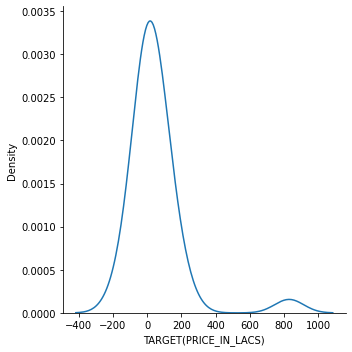

In [ ]:
import seaborn as sns
sns.displot(y_pred-y_test,kind='kde')